# Training and Testing of Model :

# Naive Bayes Model

In [57]:
import pandas as pd
import numpy as np
import nltk
import re
import unicodedata
from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen as ureq

dataset=pd.read_csv('datasett.csv',encoding='latin-1')


In [58]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
def ProcessReview(sentence):
    review = re.sub('[^a-zA-Z]',' ',sentence)
    review = review.lower()
    review = word_tokenize(review)
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review]
    return review

In [59]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\could\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[]
for i in range(0,9999):
    corpus.append(ProcessReview(dataset['text'][i]))

In [61]:
corpus1=corpus
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(tokenizer=lambda doc: doc, lowercase=False,max_features=1500)
X=cv.fit_transform(corpus1)
X=X.toarray()

In [62]:
Y=dataset.iloc[:,0].values

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [64]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
model=classifier.fit(X_train,Y_train)

In [65]:
Y_pred=classifier.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test,Y_pred)
cm

array([[665, 276],
       [189, 870]], dtype=int64)

In [67]:
model.score(X_train,Y_train)

0.805975746968371

In [68]:
model.score(X_test,Y_test)

0.7675

In [69]:
Y_pred_train=classifier.predict(X_train)

In [70]:
from sklearn.metrics import confusion_matrix
cm2= confusion_matrix(Y_train,Y_pred_train)
cm2

array([[2987,  947],
       [ 605, 3460]], dtype=int64)

# LSTM Model

In [16]:
#Data Pre-Processing

import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

data = pd.read_csv("datasett.csv",encoding='latin-1')

tokenizer = Tokenizer(num_words=2000, split=' ')

tokenizer.fit_on_texts(data['text'])
X = tokenizer.texts_to_sequences(data['text'])
X = pad_sequences(X)
Y = data['sentiment']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

Using TensorFlow backend.
C:\Users\could\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\could\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\could\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\could\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [46]:
#Model Creation and Training

model = Sequential()

model.add( Embedding(2000, 128, input_length = X.shape[1], dropout=0.2))
model.add( Bidirectional(LSTM(196, dropout_U = 0.2, dropout_W = 0.2)))
model.add( Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history=model.fit(X_train, Y_train, nb_epoch = 7, batch_size = 100, verbose = 2)

C:\Users\could\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  """
C:\Users\could\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  
C:\Users\could\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/7
 - 126s - loss: 0.6125 - accuracy: 0.6785
Epoch 2/7
 - 128s - loss: 0.3876 - accuracy: 0.8344
Epoch 3/7
 - 131s - loss: 0.3262 - accuracy: 0.8675
Epoch 4/7
 - 131s - loss: 0.2740 - accuracy: 0.8910
Epoch 5/7
 - 130s - loss: 0.2442 - accuracy: 0.9075
Epoch 6/7
 - 128s - loss: 0.2350 - accuracy: 0.9135
Epoch 7/7
 - 127s - loss: 0.2093 - accuracy: 0.9235


In [47]:
#Model Testing

import numpy as np
y=model.predict(X_test)
Y=np.argmax(y,axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y)

array([[783, 163],
       [180, 874]], dtype=int64)

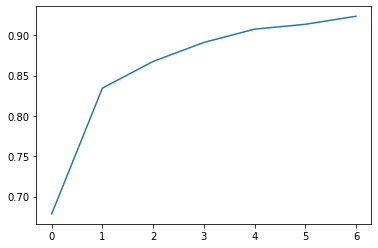

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

# Deployment of Model :

In [40]:
#Data Mining

from selenium import webdriver
from bs4 import BeautifulSoup
from urllib.request import urlopen as ureq
my_url=str(input("enter url"))
uclient=ureq(my_url)
page_html=uclient.read()
uclient.close()

enter urlhttps://www.flipkart.com/samsung-galaxy-s9-midnight-black-64-gb/product-reviews/itmf33a69rpszgzn?pid=MOBF2VWVBGCT5QQN&lid=LSTMOBF2VWVBGCT5QQN0ZJFUP&marketplace=FLIPKART


In [41]:
#Data Parsing and Storing Reviews in a csv file

page_soup1=BeautifulSoup(page_html,"html.parser")
totpages=page_soup1.find("div",{"class":"_2zg3yZ _3KSYCY"})
totpages=totpages.span.text.strip()
x=""
while(totpages[-1]!=" "):
    x=x+totpages[-1]
    totpages=totpages[0:len(totpages)-1]
x=int(x[::-1].replace(",",""))
print("pages",x)
filename="products2.csv"
headers="productname,review\n"
f=open(filename,"w",encoding='utf-8')
f.write(headers)
x= 15 if x>15 else x
for z in range(1,x+1):
    my_url=my_url+"&page="+str(z)
    uclient=ureq(my_url)
    page_html=uclient.read()
    uclient.close()
    page_soup=BeautifulSoup(page_html,"html.parser")
    containers=page_soup.findAll("div",{"class":"_1PBCrt"})
    pn=page_soup.find("div",{"class":"_3BTv9X"})
    pn=pn.img["alt"]
    for cont in containers:
        review=cont.findAll("p",{"class":"_2xg6Ul"})
        review=review[0].text
        revwords=review.split()
        if len(revwords)<191:
            f.write(str(pn.replace(",","/"))+","+str(review.replace(",","/"))+"\n")
tp='IT DIDNT WORK WE BUY NEW IT DIE ON ME DON.T BUY IT: THE VHS WE BUY DID NOT WORK THE MATCHS WERE BORING TOO BORING I KNOW DON.T HOW WWF CAN HAVE A BAD PPV BUT THEY CAN WE BUY NEW IT WAS SO NEW BUT IT DIE ON ME DON.T BUY THIS ON VHS THIS VHS WAS NEW BUT DIDNT PLAY I HAVE NOT SEEN ALL OF THE PPV BUT WHAT I HAVE SEEN IT DIDNT PLAY GOOD NOT GOOD AT ALL IF YOU WANT TO WATCH IT GET ON DVD THAT ALL HAVE TO SAY DON.T BUY THE VHS IF YOU WANT A GOOD PPV BUY HELL IN THE CALL 2012 THAT ONE GOOD i was not happy to have a vhs i buy not work not happy at all it was too old to play good it woods not work i was sad when it did.nt work i woods not buy a wwf vhs for a 2 time the ppv was poor not that fun to watch it the wwf and a bad ppv i want to see a good wwf ppv'
f.write(str(pn.replace(",","/"))+","+tp+"\n")
f.close()

pages 174


In [42]:
#Model Deployment

data2 = pd.read_csv("products2.csv",encoding='latin-1')
tokenizer = Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(data2['review'])
X2 = tokenizer.texts_to_sequences(data2['review'])
X2 = pad_sequences(X2)
y2=model.predict(X2)
result=np.argmax(y2,axis=1)
posrev=np.count_nonzero(result == 1)
negrev=len(result)-posrev-1
print(f'positive reviews: {posrev}\nnegative reviews: {negrev}')

positive reviews: 118
negative reviews: 32
